In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline


DATASET

In [3]:

data = pd.read_csv('D:\DATASET\heart attack.csv')
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.drop(['education'],axis=1,inplace=True)


In [5]:
data.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Data Analysis

In [6]:

missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0])*100
print(f'total percentage of data missing is {round(total_percentage,2)}%')

total percentage of data missing is 12.74%


In [7]:

total = data .isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


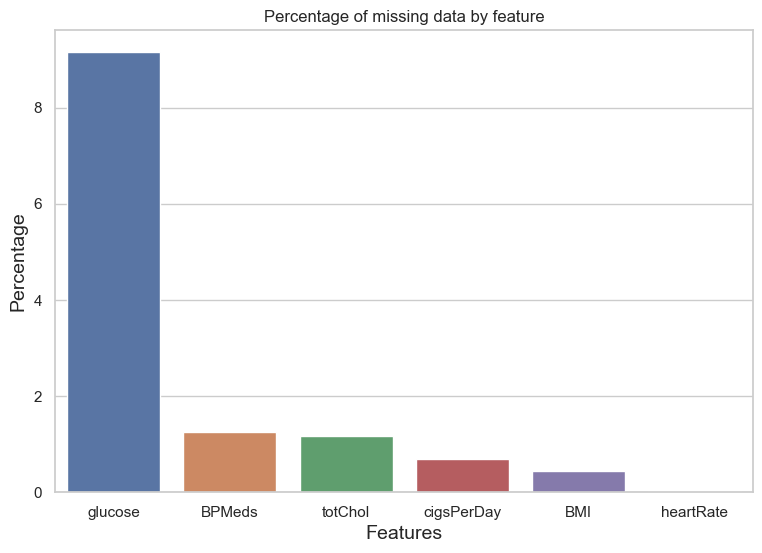

In [8]:
plt.figure(figsize =(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index,y = missing_data['Percentage'],data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [9]:
data.dropna(axis= 0, inplace = True)
data.shape

(3751, 15)

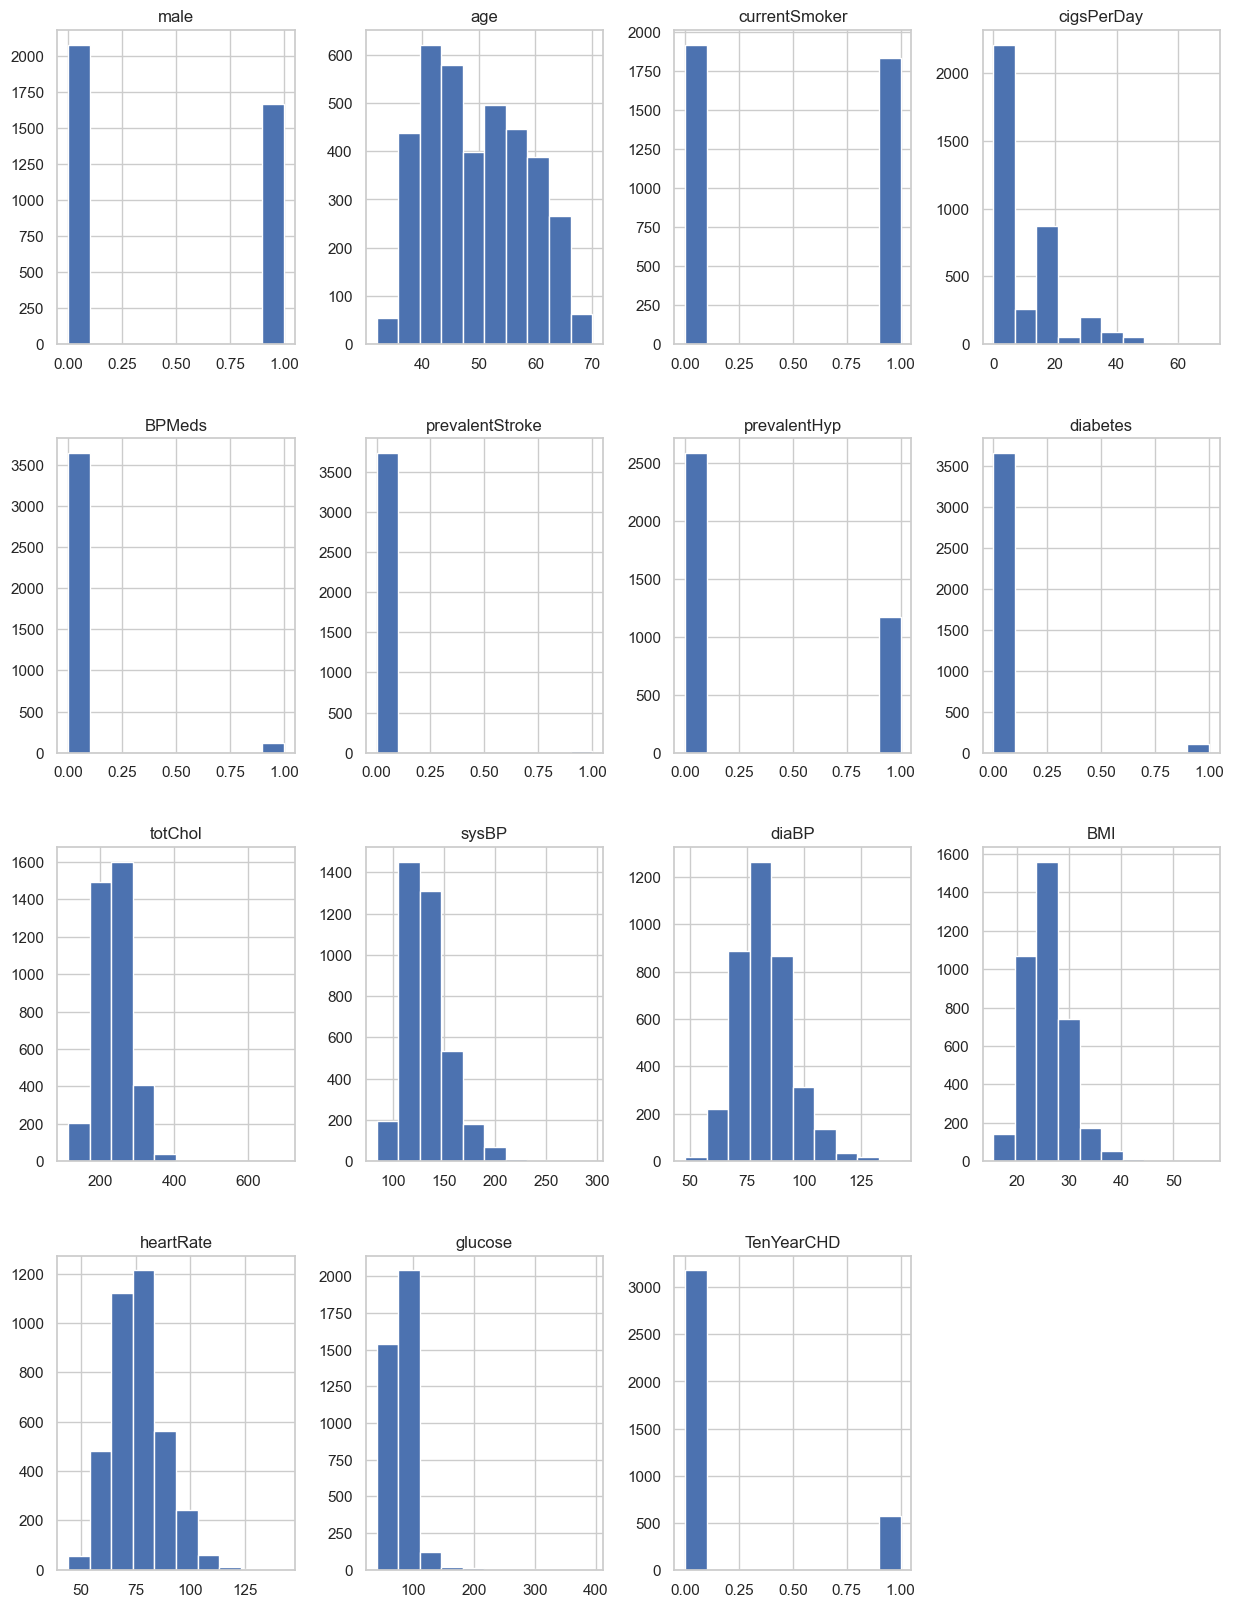

In [10]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()


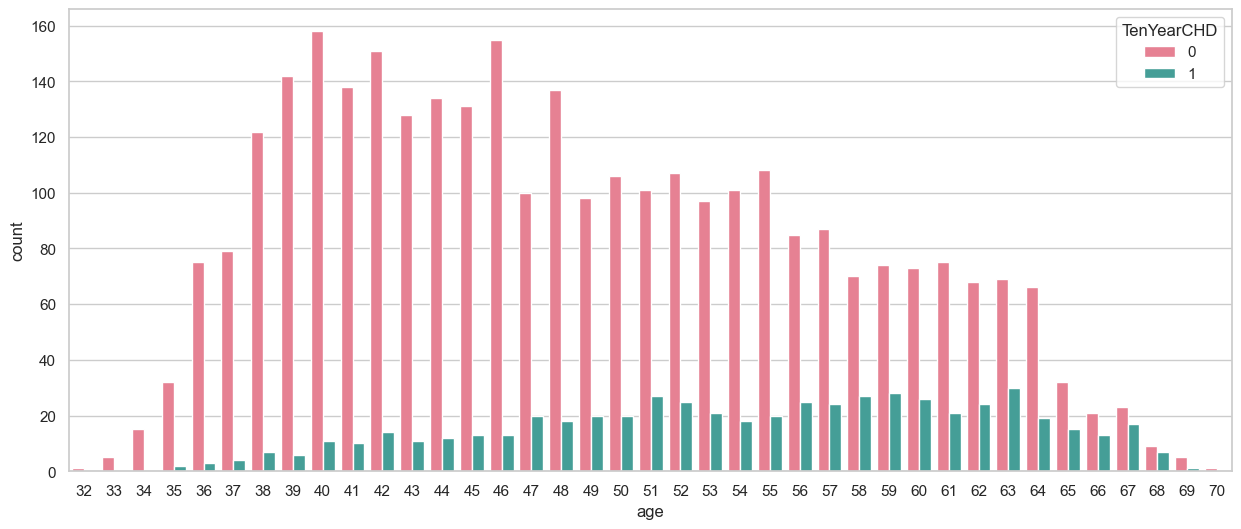

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

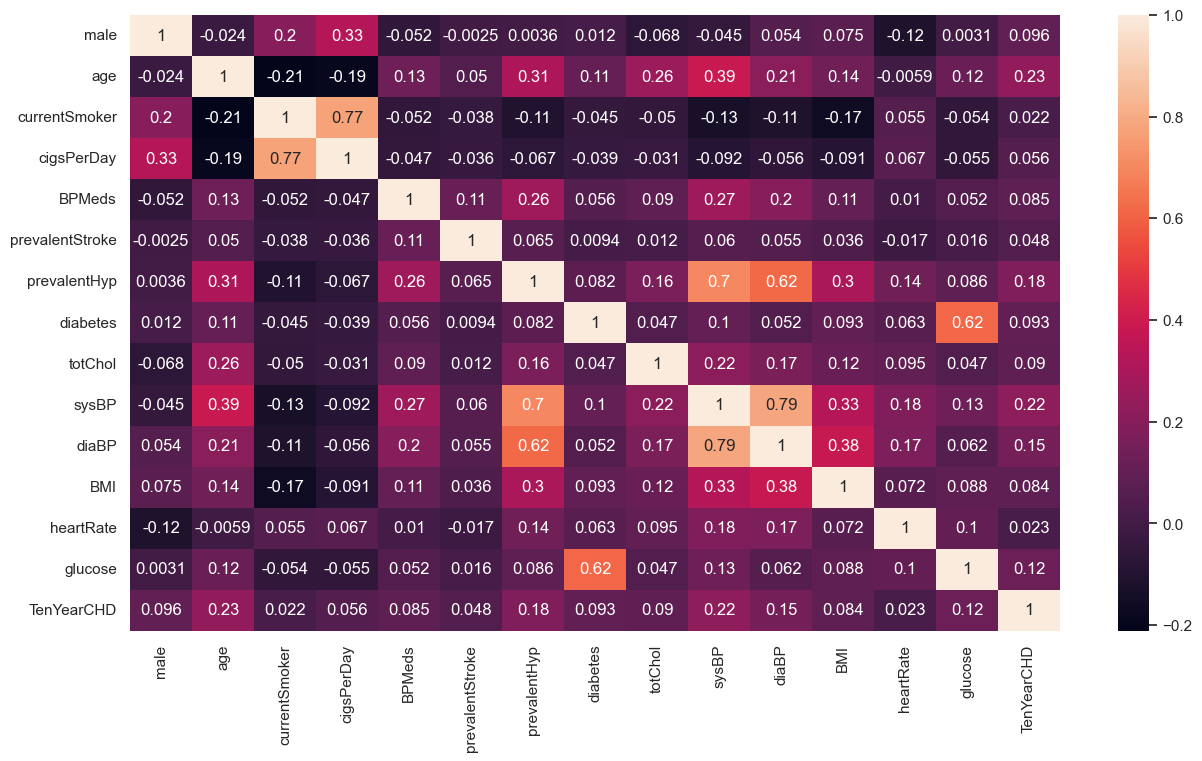

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [14]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

 
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 

feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2469B98EE40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2469B98EE40, verbose=2)

In [15]:
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important


['age', 'sysBP']

In [16]:
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [18]:
X = data[top_features]
y = data.iloc[:,-1]

In [19]:

num_before = dict(Counter(y))


over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X, y)

num_after =dict(Counter(y_smote))

In [20]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


 Splitting data to Training and Testing set

In [21]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()


,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,40,215.0,110.0,70.0,19.64,70.0,87.0,0
1,48,232.0,130.5,90.0,29.07,85.0,118.0,0
2,42,237.0,105.0,75.0,23.85,70.0,87.0,0
3,54,260.0,116.0,77.0,28.56,57.0,61.0,0
4,59,176.0,134.5,87.0,31.76,80.0,93.0,0


In [22]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()


,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,40,215.0,110.0,70.0,19.64,70.0,87.0
1,48,232.0,130.5,90.0,29.07,85.0,118.0
2,42,237.0,105.0,75.0,23.85,70.0,87.0
3,54,260.0,116.0,77.0,28.56,57.0,61.0
4,59,176.0,134.5,87.0,31.76,80.0,93.0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [26]:
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [27]:
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}

In [28]:
logistic_predict = logistic_clf.predict(X_test)

In [29]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.64%


In [30]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       647
           1       0.61      0.66      0.63       498

    accuracy                           0.67      1145
   macro avg       0.66      0.67      0.66      1145
weighted avg       0.67      0.67      0.67      1145



<AxesSubplot:>

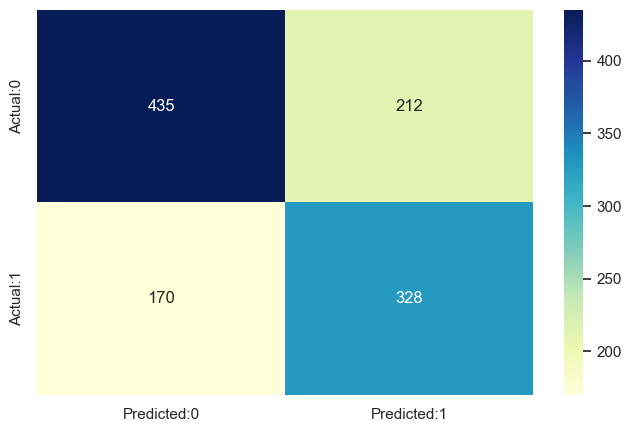

In [31]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [32]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 63.2%


k- Nearest neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier


In [34]:
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)


In [35]:
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 


{'n_neighbors': 1}

In [36]:
knn_predict = knn_clf.predict(X_test)

In [37]:
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")


Using k-nearest neighbours we get an accuracy of 85.59%


<AxesSubplot:>

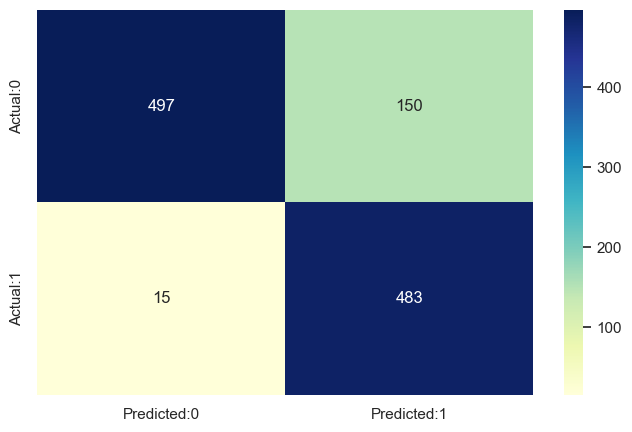

In [38]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [39]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')



The f1 score for K nearest neignbours is 85.41%


In [40]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       647
           1       0.76      0.97      0.85       498

    accuracy                           0.86      1145
   macro avg       0.87      0.87      0.86      1145
weighted avg       0.88      0.86      0.86      1145



Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [42]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)


In [43]:
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 


{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}

In [44]:
tree_predict = tree_clf.predict(X_test)

In [45]:
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")


Using Decision Trees we get an accuracy of 74.41%


<AxesSubplot:>

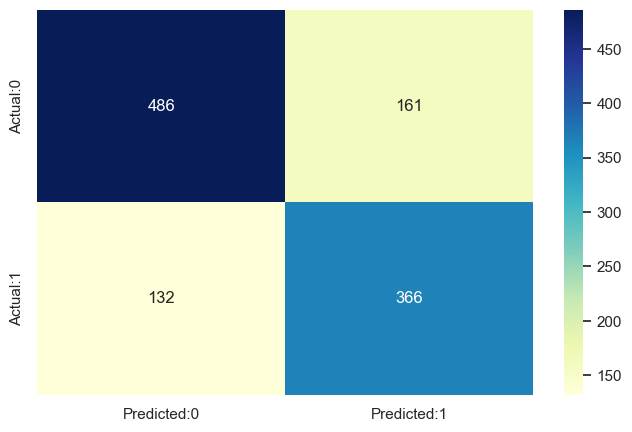

In [46]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


In [47]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')


The f1 score Descision trees is 71.41%


In [48]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       647
           1       0.69      0.73      0.71       498

    accuracy                           0.74      1145
   macro avg       0.74      0.74      0.74      1145
weighted avg       0.75      0.74      0.74      1145



MODEL COMARISION

In [49]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy,'F1 score':tree_f1}}).T

In [50]:
comparison

,Accuracy,F1 score
Logistic regression,0.666376,0.631985
K-nearest neighbours,0.855895,0.854111
Decision trees,0.744105,0.714146


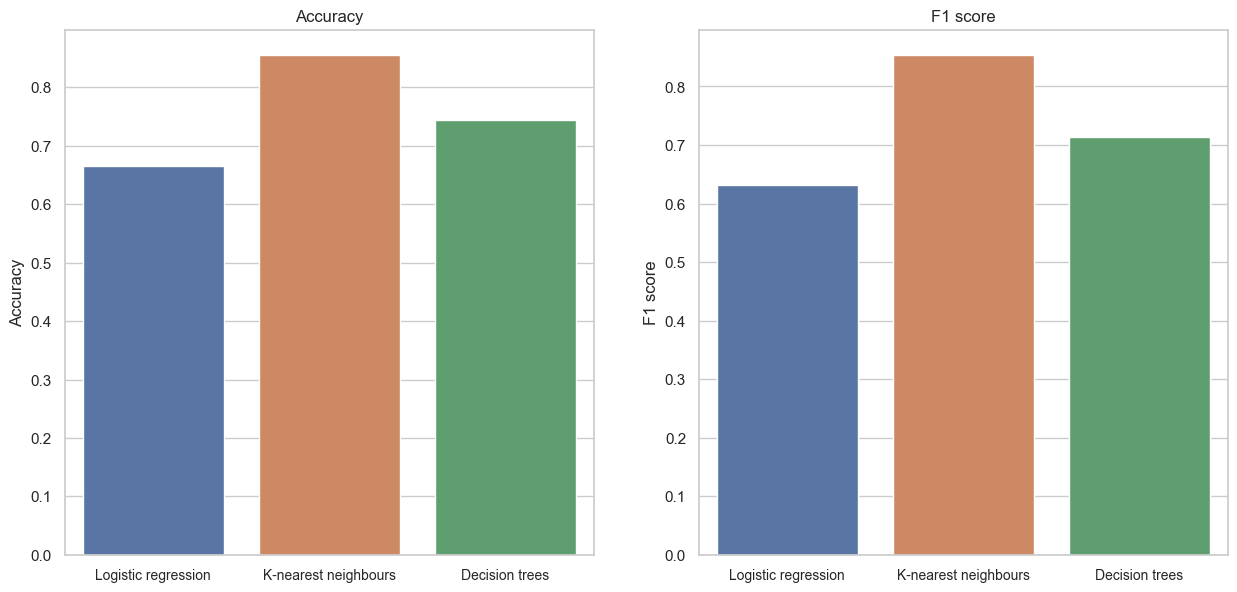

In [51]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()


In [52]:
my_data =[top_features]
my_data =np.array([40,80,120,200,9,75,120])
new_mydata = my_data.reshape(1,7)
logistic_predict = logistic_clf.predict(new_mydata)
knn_predict = knn_clf.predict(new_mydata)
tree_predict = tree_clf.predict(new_mydata)


In [53]:
print('risk not found') if logistic_predict[0]==0 else print('you are in risk')
print('risk not found') if knn_predict[0]<0.5 else print('you are in risk')
print('risk not found') if tree_predict[0]<0.5 else print('you are in risk')

risk not found
you are in risk
you are in risk


In [58]:

from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
   
    result= knn_clf.predict(new_mydata)
    
    if result <= 0.5:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age (20-80)").grid(row=1)
Label(master, text="Enter you Totchol value (150-300)").grid(row=2)
Label(master, text="Enter Value of sysBP(100-150)").grid(row=3)
Label(master, text="Enter Value of diaBP(70-150)").grid(row=4)
Label(master, text="Enter Value of BMI(20-40)").grid(row=5)
Label(master, text="Enter Value of heartrate(50-200)").grid(row=6)
Label(master, text="Enter Value of glucose(50-150)").grid(row=7)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()